Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

importing the dataset

In [3]:
df=pd.read_csv('data.csv')
print(df)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

In [5]:
# Preprocessing: Selecting features and target variable
x = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']]
y = df['price']
print(x)
print(y)

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0          3.0       1.50         1340      7912     1.5           0     0   
1          5.0       2.50         3650      9050     2.0           0     4   
2          3.0       2.00         1930     11947     1.0           0     0   
3          3.0       2.25         2000      8030     1.0           0     0   
4          4.0       2.50         1940     10500     1.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4595       3.0       1.75         1510      6360     1.0           0     0   
4596       3.0       2.50         1460      7573     2.0           0     0   
4597       3.0       2.50         3010      7014     2.0           0     0   
4598       4.0       2.00         2090      6630     1.0           0     0   
4599       3.0       2.50         1490      8102     2.0           0     0   

      condition  
0             3  
1             5  
2        

split into test & train data

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
1898       4.0       2.50         2770     45514     2.0           0     0   
1370       4.0       3.00         3720     29043     2.0           0     0   
3038       4.0       2.50         2810     11120     2.0           0     0   
2361       4.0       3.75         4030     10800     2.0           0     0   
156        3.0       2.00         2000      7000     2.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4426       3.0       1.00         1180      5002     1.5           0     0   
466        4.0       2.00         2520      6000     1.0           0     0   
3092       3.0       1.00         1150      8145     1.0           0     0   
3772       2.0       1.00          910      2002     1.5           0     0   
860        2.0       1.00         1490      3825     1.0           0     0   

      condition  
1898          4  
1370          3  
3038     

Train the model

In [7]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

predict the test results

In [9]:
y_pred=regressor.predict(x_test)

Visualize using matplotlib

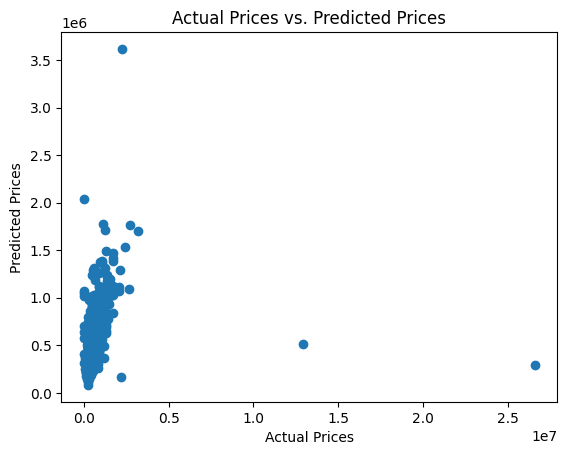

In [11]:
# To visualize the predictions against actual prices, we'll use a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

Take input from user & predict values


In [12]:
# Taking input from the user
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))
sqft_living = int(input("Enter the living area in square feet: "))
sqft_lot = int(input("Enter the lot size in square feet: "))
floors = int(input("How many floors does it have "))
waterfront = int(input("Does it have a waterfront? (1 for Yes, 0 for No): "))
view = int(input("Does it have a view? (1 for Yes, 0 for No): "))
condition = int(input("Rate the condition of the house"))
# Creating the data list
new_data = [[bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition]]
# Defining the column names
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']
# Creating the DataFrame
new_data_df = pd.DataFrame(new_data, columns=columns)

Enter the number of bedrooms: 3
Enter the number of bathrooms: 2
Enter the living area in square feet: 1500
Enter the lot size in square feet: 4000
How many floors does it have 1
Does it have a waterfront? (1 for Yes, 0 for No): 0
Does it have a view? (1 for Yes, 0 for No): 0
Rate the condition of the house3


In [14]:
predicted_price=regressor.predict(new_data_df)
print("predicted house price is :",predicted_price[0])

predicted house price is : 331038.9687692916
